# The sociology of rats

In a population of interacting individuals, for instance **_rats_** in a cage, the mood of one individual can influence the others. Moreover, a collective behaviour can emerge if the interactions are sufficiently numerous, for instance if the density of the rats gets sufficiently large.

A simple model for studying this phenomenon considers a population of individuals (rats!) which can be either _calm_ or _nervous_.

The rats leave in a two-dimensional grid and each rat moves randomly from site to site.

At each time step a rat moves to a nearest-neighbour site, chosen randomly.
Two rats cannot occupy the same site, hence if no free site is available nearby, the rat does not move.

At each step the rat checks the state of the neighbouring rats in the neighbouring site: if they are all calm, the rat becomes calm. If any is nervous, the rat gets nervous as well. Moreover, with a small probability $p$, at each step a rat can become nervous spontaneously.

It can be proven that the fraction of nervous rats in the population undergoes a _phase transition_ driven by the density $\rho$ of rats in the lattice: below a certain _critical value_ $\rho_c$ the fraction of nervous rats is small (in fact it would be zero on an infinitely large lattice). Raising the density of rats above $\rho_c$, the fraction of nervous rats increases abruptly.

## Assignment 1

Define a _class_ which describes rats living at the nodes of a square $L\times L$ lattice, on which we will assume **periodic** boundary conditions.

Each node or site of the lattice can be in three possible states:
* empty;
* occupied by a calm rat;
* occupied by a nervous rat;

you are free to choose how to represent these three states.

To be useful, the class will require several methods:
* the _constructor_ method will accept the size of the lattice, the density $\rho$ of rats to be placed randomly on it, the probability $p$ of a rat getting nervous.
* the _update_ method will allow generating a new configuration by
    * randomly change calm rats into nervous ones with probability $p$;
    * move each rat to a neighbouring free site
    * check the status of nearest neighbour rats: if all are calm, the rat becomes calm as well. If any is nervous, the rat gets nervous as well.
* the _measure_ method will count the number of nervous rats, returning the fraction of nervous rats over the total population.
* the _evolve_ method will accept as parameters the number $N_t$ of _thermalisation_ steps, the number $N_m$ of _measurements_ and the number $N_d$ of _drop_ steps. It will evolve the system first by $N_t$ time steps to thermalise it, then it will evolve the system for $N_m\times N_d$ steps and take one measurement every $N_d$ steps. It will return the fraction $f_n$ of nervous rats averaged over the simulation, its standard deviation $\sigma_n$, and also the vector of the $N_m$ individual measurements taken.
* the _draw_ method will show a plot of the status of the lattice, in which rats are drawn as dots on the lattice, with different colours depending on their status.

**Note 1**: this class can be written in various ways, equivalent from the point of view of functionality, but possibly with very different memory footprint and computational efficiency.
For instance, one may choose to allocate the whole lattice; or one can allocate only the rats, namely their state and coordinates on the lattice, which can be more efficient when the density of rats is small.

The functions of the `numpy` library that we have exploited during the course to parallelize the code, for instance `numpy.where` which allows to choose elements on the basis of a condition, can be of great help here.

**Note 2**: beware, two rats cannot be on the same site. It is necessary to take this into account when moving the rats.

**Note 3**: if you have doubts about what it means to take measurements, computing averages and standard deviations, please review the lesson [06.03](https://blended.uniurb.it/moodle/mod/folder/view.php?id=458258) about the Ising model.

To check the code, try running the _evolve_ method with $p=0.01$, $L=30$, using $N_t=1000, N_m=1000, N_d=10$ to compute the average fractions $f_n$ of nervous rats for different values of $\rho$. For instance choose $\rho = 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5$ and see what happens. By plotting the measured averaged $f_n$ as a function of $\rho$, you should observe small values of $f_n$ for small values of $\rho$, then a transition to larger values as $\rho$ increases, and you should be able to _roughly_ locate the critical value $\rho_c$.

## Assignment 2

Keep $p=0.01$ but choose now a larger lattice, at least $L=50$ if your computer manages to complete the simulation within reasonable time limits.
Otherwise, choose a lattice as large as you find viable.

Perform simulations with $N_t=1000, N_m=1000, N_d=10$ at several values of the density $\rho$ of rats, in order to better visualize the transition occurring at $\rho_c$, by plotting the fraction $f_n$ of nervous rats (averaged over the simulation) against the density $\rho$.
You are free to choose the number of $\rho$ values and their spacing, in order to obtain a clearer plot; your goal is to locate more accurately the value of $\rho_c$.

**Note:** since the goal is to locate the value of $\rho_c$, and considering that larger $\rho$ values typically require longer simulations (more rats!), it can be convenient to limit the simulation to values close to the $\rho_c$ value estimated on smaller lattices.

Draw also a plot of the standard deviation $\sigma_n$, as a function of $\rho$; it should display larger values when being close to $\rho_c$.

# Assignment 3

Set the lattice size at $L=50$, the probability $p=0.01$, and choose three values of $\rho$
* one well below $\rho_c$
* one close to $\rho_c$
* one well above $\rho_c$

For each chosen value of $\rho$ perform a simulation with $N_t=1000, N_m=10000, N_d=1$, obtaining the individual measurements of $f_n$.

Compute the _autocorrelation_ of the values of $f_n$, and see if there are differences in its shape between the three cases.

**Note** If you have doubts about how to compute an autocorrelation, please review lesson [06.02](https://blended.uniurb.it/moodle/mod/folder/view.php?id=458258) about Distributions.

## Assignment 4

Add an *animation* method to the class which allows to create an animation of the evolution of the lattice.

Please exploit the techniques of the `matplotlib` that we have introduced in various lessons, for instance in [04.06](https://blended.uniurb.it/moodle/pluginfile.php/792656/mod_folder/content/0/04_06_Reaction_Diffusion_Solved.ipynb?forcedownload=1)

Try producing a few animations corresponding to the parameters used for Assignment 3.

In [50]:
from io import UnsupportedOperation
import numpy as np
import numpy.random as rnd
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import sys
import math
from enum import Enum

In [51]:


class node_state(Enum):
  EMPTY = 0
  CALM_RAT = 1
  ANGRY_RAT = 2

  def __str__(self) -> str:
    return 0 if self == node_state.EMPTY else 1 if self == node_state.CALM_RAT else 2


In [57]:


class Lattice:

    def __init__(self, **kwargs):
      """Lattice

      Optional parameters
      --------------------
      size : int
        side of the square lattice, default is 100
      density : float [0, 1]
        density of rats over the lattice, default is 0.5
      prob_of_nervous : float [0, 1]
        probability of a rat spontaneously becoming nervous, default is 0.01
      """
      self.size = int(kwargs.get('size', 100))
      self.density = float(kwargs.get('density', 0.5))
      self.prob_of_nervous = float(kwargs.get('nervousness', 0.01))
      self.nodes = np.zeros((self.size, self.size), node_state)
      self.num_of_rats = 0
      self.num_of_angry_rats = 0
      self.age = 0
      self.__create_rats()

    def update(self):
      #Is the rat angry?
      for x in range(self.size):
        for y in range(self.size):
          if(self.nodes[x][y] != node_state.EMPTY):
            if(self.nodes[x][y] == node_state.CALM_RAT):
              self.__update_rat(x, y)
            self.__move_rat(x, y)
            self.__influence_rats(x, y)
      #Move all rats
      #Check nearby rats
      self.age += 1
    def __update_rat(self, x, y):
      if(rnd.random() < self.prob_of_nervous):
        self.nodes[x][y] = node_state.ANGRY_RAT
        self.num_of_angry_rats += 1

    def __move_rat(self, x, y):
      #UP = 0
      #DOWN = 1
      #LEFT = 2
      #RIGHT = 3
      dir = rnd.randint(0,4)
      if(dir == 0 and y + 1 < self.size):
        self.nodes[x][y + 1] = self.nodes[x][y] if self.nodes[x][y + 1] == node_state.EMPTY else self.nodes[x][y + 1]
      elif(dir == 1 and y - 1 >= 0):
        self.nodes[x][y - 1] = self.nodes[x][y] if self.nodes[x][y - 1] == node_state.EMPTY else self.nodes[x][y - 1]
      elif(dir == 2 and x - 1 >= 0):
        self.nodes[x - 1][y] = self.nodes[x][y] if self.nodes[x - 1][y] == node_state.EMPTY else self.nodes[x - 1][y]
      elif(dir == 3 and x + 1 < self.size):
        self.nodes[x + 1][y] = self.nodes[x][y] if self.nodes[x + 1][y] == node_state.EMPTY else self.nodes[x + 1][y]

    def __influence_rats(self, x, y):
      if(y + 1 < self.size and self.nodes[x][y + 1] == node_state.ANGRY_RAT or\
         y - 1 >= 0 and self.nodes[x][y - 1] == node_state.ANGRY_RAT or\
         x - 1 >= 0 and self.nodes[x - 1][y] == node_state.ANGRY_RAT or\
         x + 1 < self.size and self.nodes[x + 1][y] == node_state.ANGRY_RAT):
        self.nodes[x][y] = node_state.ANGRY_RAT
        self.num_of_angry_rats += 1
      else:
        self.nodes[x][y] = node_state.CALM_RAT
        self.num_of_angry_rats -= 1

    def evolve(self, therm_steps, measr_steps, drop_steps):
      for x in range(therm_steps):
        self.update()

      for x in range(measr_steps):
        self.update()
        if(measr_steps % drop_steps == 0):
          self.measure()

    def draw(self):
      fig = plt.figure(figsize= (11,7), dpi = 100)
      X,Y = np.meshgrid(range(self.size), range(self.size))

      plt.plot(Y, X, 'k.')
      plt.xlabel(r'$X$', fontsize = 16)
      plt.ylabel(r'$Y$', fontsize = 16)
      plt.show()

    def measure(self) -> float:
      if(self.num_of_rats == 0):
        raise ZeroDivisionError
      return self.num_of_angry_rats / self.num_of_rats

    def __create_rats(self):
      #For each node: calculate if spot is empty or with a CALM rat
      x2 = rnd.rand(self.size, self.size)
      for x in range(self.size):
        for y in range(self.size):
          if(x2[x][y] > self.density):
            self.nodes[x][y] = node_state.EMPTY
          else:
            node_state.CALM_RAT
            self.num_of_rats += 1

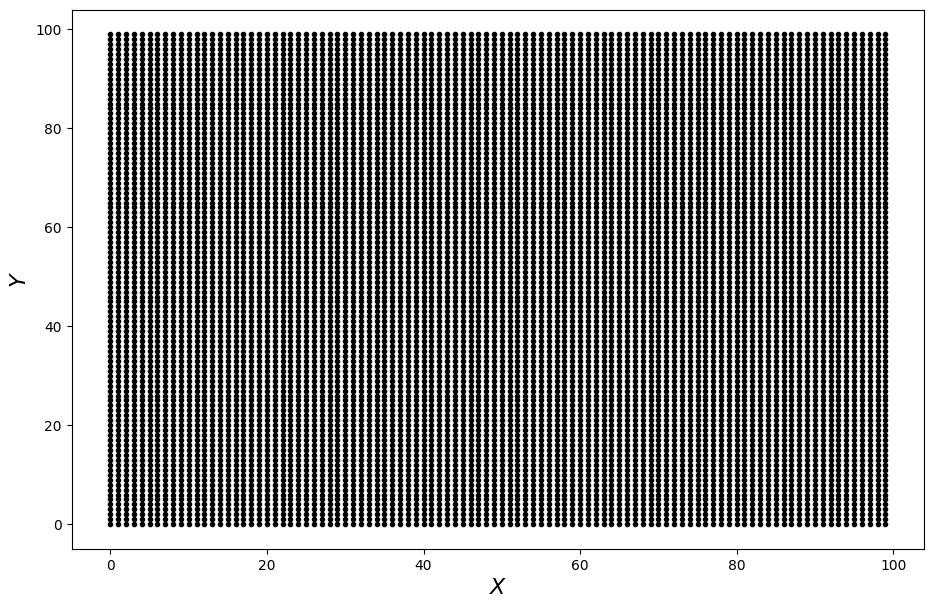

In [58]:
c = Lattice()

c.evolve(1000, 100, 5)
c.draw()